In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
act_lab = {
    1:{'name':'lying','intensity':1},
    2:{'name':'sitting','intensity':1},
    3:{'name':'standing','intensity':1},
    4:{'name':'walking','intensity':2},
    5:{'name':'running','intensity':3},
    6:{'name':'cycling','intensity':3},
    7:{'name':'Nordic walking','intensity':3},
    9:{'name':'watching TV','intensity':1},
    10:{'name':'computer work','intensity':1},
    11:{'name':'car driving','intensity':2},
    12:{'name':'ascending stairs','intensity':2},
    13:{'name':'descending stairs','intensity':2},
    16:{'name':'vacuum cleaning','intensity':2},
    17:{'name':'ironing','intensity':1},
    18:{'name':'folding laundry','intensity':1},
    19:{'name':'house cleaning','intensity':2},
    20:{'name':'playing soccer','intensity':3},
    24:{'name':'rope jumping','intensity':3}
}

In [3]:
df = pd.read_pickle('physical_activity.pkl')

In [4]:
df_id,df_data = [df['Activity ID'],df[[item for item in df.columns if not item=='Activity ID']]]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X = scaler.transform(df_data)
display(X)

array([[-0.09287586, -1.29176023,  0.94434284, ..., -1.62318102,
        -1.74360738, -3.73021787],
       [-0.09287586, -1.29176023,  0.95649874, ..., -1.6119905 ,
        -1.71875434, -3.73002233],
       [-0.09287586, -1.29176023,  0.95633066, ..., -1.58351542,
        -1.69428514, -3.74206267],
       ...,
       [ 2.76161597, -4.19265443, -0.42457267, ..., -0.49866077,
        -0.96720018,  0.39279389],
       [ 2.76161597, -4.19265443, -0.43136894, ..., -0.46536834,
        -0.9804332 ,  0.39292099],
       [ 2.76161597, -4.19265443, -0.46141619, ..., -0.47287865,
        -0.93890637,  0.39977953]])

In [9]:
df_scaled = pd.DataFrame(X,columns=df_data.columns)
display(df_scaled.head())

,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Chest AX,Chest AY,Chest AZ,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ
0,-0.092876,-1.29176,0.944343,0.706373,0.378938,-0.003876,0.002470,-0.003982,-0.347953,-2.051224,0.255004,-0.146315,0.339175,-0.050229,0.076235,0.018907,-0.100855,-0.114083,-1.100787,-2.219572,0.115985,-0.217991,0.747288,-0.003099,-0.007453,-0.000665,-1.623181,-1.743607,-3.730218
1,-0.092876,-1.29176,0.956499,0.614122,0.416197,-0.132182,-0.010355,-0.002876,-0.320655,-2.052252,0.215013,-0.100762,0.339123,-0.049941,0.035369,-0.055006,-0.123469,-0.093882,-1.088561,-2.219572,0.109252,-0.223160,0.716996,0.014122,0.042025,0.001760,-1.611990,-1.718754,-3.730022
2,-0.092876,-1.29176,0.956331,0.533404,0.434870,-0.183311,-0.025476,0.004260,-0.342789,-2.030054,0.275017,-0.059191,0.355753,-0.098247,-0.013621,0.058533,-0.080563,-0.120793,-1.100451,-2.219572,0.109039,-0.228454,0.706972,-0.039797,-0.050111,-0.004447,-1.583515,-1.694285,-3.742063
3,-0.092876,-1.29176,0.944771,0.533594,0.452862,-0.148476,-0.017166,0.012894,-0.306232,-2.031530,0.229958,-0.079234,0.356016,-0.066028,0.030497,-0.098857,-0.171908,-0.128647,-1.068812,-2.219572,0.103671,-0.217925,0.747087,-0.037038,0.007861,0.013698,-1.605426,-1.754537,-3.706279
4,-0.092876,-1.29176,0.957942,0.551081,0.498693,-0.053990,-0.056788,0.006842,-0.338550,-2.021314,0.250284,-0.010220,0.355993,-0.057505,-0.009606,-0.035196,-0.057635,-0.120384,-1.099898,-2.219572,0.122111,-0.223363,0.747450,-0.004591,-0.043993,-0.005271,-1.576450,-1.755438,-3.706514



Num of clusters:  2



/home/ivan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


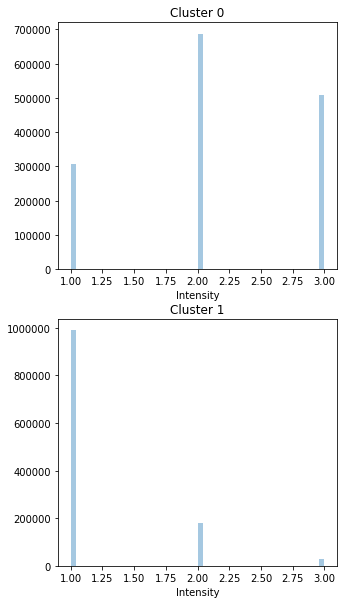

Intensity
Klabels Intensity           
0       1             307852
        2             686629
        3             508736
1       1             988646
        2             181082
        3              28065


------------------------------------------

Num of clusters:  3



/home/ivan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


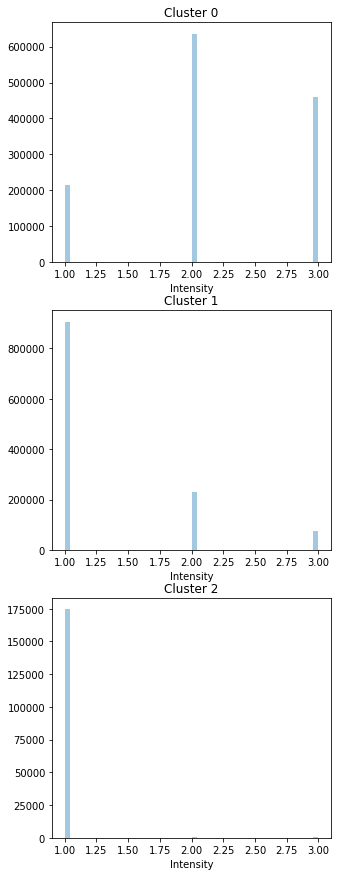

Intensity
Klabels Intensity           
0       1             215975
        2             635641
        3             461024
1       1             906054
        2             231692
        3              75176
2       1             174469
        2                378
        3                601


------------------------------------------


In [10]:
list_clus = [2,3]
for item in list_clus:
    print()
    print('Num of clusters: ',item)
    print()
    Kmodel = KMeans(n_clusters=item)
    Kmodel.fit(X)
    labs = np.unique(Kmodel.labels_)
    df_final = df.copy()
    df_final['Klabels'] = Kmodel.labels_
    df_final['Intensity'] = list(map(lambda x: act_lab[x]['intensity'],df_final['Activity ID']))
    fig = plt.figure(figsize=(5,5*len(labs)))
    counter = 0
    for e in labs:
        counter += 1
        locator = int(str(len(labs))+'1'+str(counter))
        ax = plt.subplot(locator)
        sns.distplot(df_final[df_final['Klabels']==e]['Intensity'],kde=False,ax=ax)
        ax.set_xlabel('Intensity')
        ax.set_title('Cluster %s' %e)
    plt.show()
    c = df_final.groupby(['Klabels','Intensity']).agg({'Intensity':'count'})
    display(c)
    del Kmodel
    print()
    print('------------------------------------------')

In [11]:
from sklearn.cluster import DBSCAN

In [ ]:
list_eps = [1,1.5,2]
list_min_samples = [2,5,15]

for item in list_eps:
    for it in list_min_samples:
        dbscan = DBSCAN(eps=item,min_samples=it)
        dbscan.fit(X)
        name = str(item)+' eps, '+str(it)+' min samples'
        print()
        print(name)
        print()
        customers_bonus_dbscan[name] = dbscan.labels_

        labs = np.unique(Kmodel.labels_)
        df_final = df.copy()
        df_final['dblabels'] = dbscan.labels_
        df_final['Intensity'] = list(map(lambda x: act_lab[x]['intensity'],df_final['Activity ID']))
        fig = plt.figure(figsize=(5,5*len(labs)))
        counter = 0
        for e in labs:
            counter += 1
            locator = int(str(len(labs))+'1'+str(counter))
            ax = plt.subplot(locator)
            sns.distplot(df_final[df_final['dblabels']==e]['Intensity'],kde=False,ax=ax)
            ax.set_xlabel('Intensity')
            ax.set_title('Cluster %s' %e)
        plt.show()
        c = df_final.groupby(['dblabels','Intensity']).agg({'Intensity':'count'})
        display(c)
    
        plt.show()
        print()
        print('-----------------------------------------')